In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#  loading the dataset 
df = pd.read_csv('Employment_Unemployment_GDP_data.csv')

In [18]:
df.head()

,Country Name,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
0,Albania,1991,53.299533,12.172764,34.527781,10.304,1.099559e+09
1,Algeria,1991,24.118566,25.067734,50.813700,20.600,4.571568e+10
2,Angola,1991,40.071857,8.163345,51.764822,16.855,1.060378e+10
3,Argentina,1991,13.669999,28.505903,57.824098,5.440,1.897200e+11
4,Armenia,1991,54.263252,15.790454,29.946294,1.783,2.069870e+09


In [19]:
df.columns

Index(['Country Name', 'Year', 'Employment Sector: Agriculture',
       'Employment Sector: Industry', 'Employment Sector: Services',
       'Unemployment Rate', 'GDP (in USD)'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    5751 non-null   object 
 1   Year                            5751 non-null   int64  
 2   Employment Sector: Agriculture  5751 non-null   float64
 3   Employment Sector: Industry     5751 non-null   float64
 4   Employment Sector: Services     5751 non-null   float64
 5   Unemployment Rate               5751 non-null   float64
 6   GDP (in USD)                    5751 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 314.6+ KB


In [21]:
df.isnull().sum()

Country Name                      0
Year                              0
Employment Sector: Agriculture    0
Employment Sector: Industry       0
Employment Sector: Services       0
Unemployment Rate                 0
GDP (in USD)                      0
dtype: int64

In [22]:
df['Year']=pd.to_datetime(df['Year'],format= '%Y')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Country Name                    5751 non-null   object        
 1   Year                            5751 non-null   datetime64[ns]
 2   Employment Sector: Agriculture  5751 non-null   float64       
 3   Employment Sector: Industry     5751 non-null   float64       
 4   Employment Sector: Services     5751 non-null   float64       
 5   Unemployment Rate               5751 non-null   float64       
 6   GDP (in USD)                    5751 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 314.6+ KB


In [24]:
df.describe()

,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
count,5751,5751.000000,5751.000000,5751.000000,5751.000000,5.751000e+03
mean,2006-07-27 16:22:17.089201664,28.857051,19.773784,51.369166,8.155004,3.099333e+11
min,1991-01-01 00:00:00,0.107774,2.060372,5.314014,0.100000,7.228540e+07
25%,1999-01-01 00:00:00,7.173214,13.889285,36.846735,3.659000,5.098458e+09
50%,2007-01-01 00:00:00,22.172104,20.105516,52.657618,6.358000,1.972356e+10
75%,2014-01-01 00:00:00,46.130703,25.345213,66.602313,10.996000,1.277237e+11
max,2022-01-01 00:00:00,92.482036,59.579079,93.416932,38.800000,2.600689e+13
std,NaN,24.026669,8.606954,18.892155,6.147428,1.375556e+12


In [25]:
#  now lets move to eda 


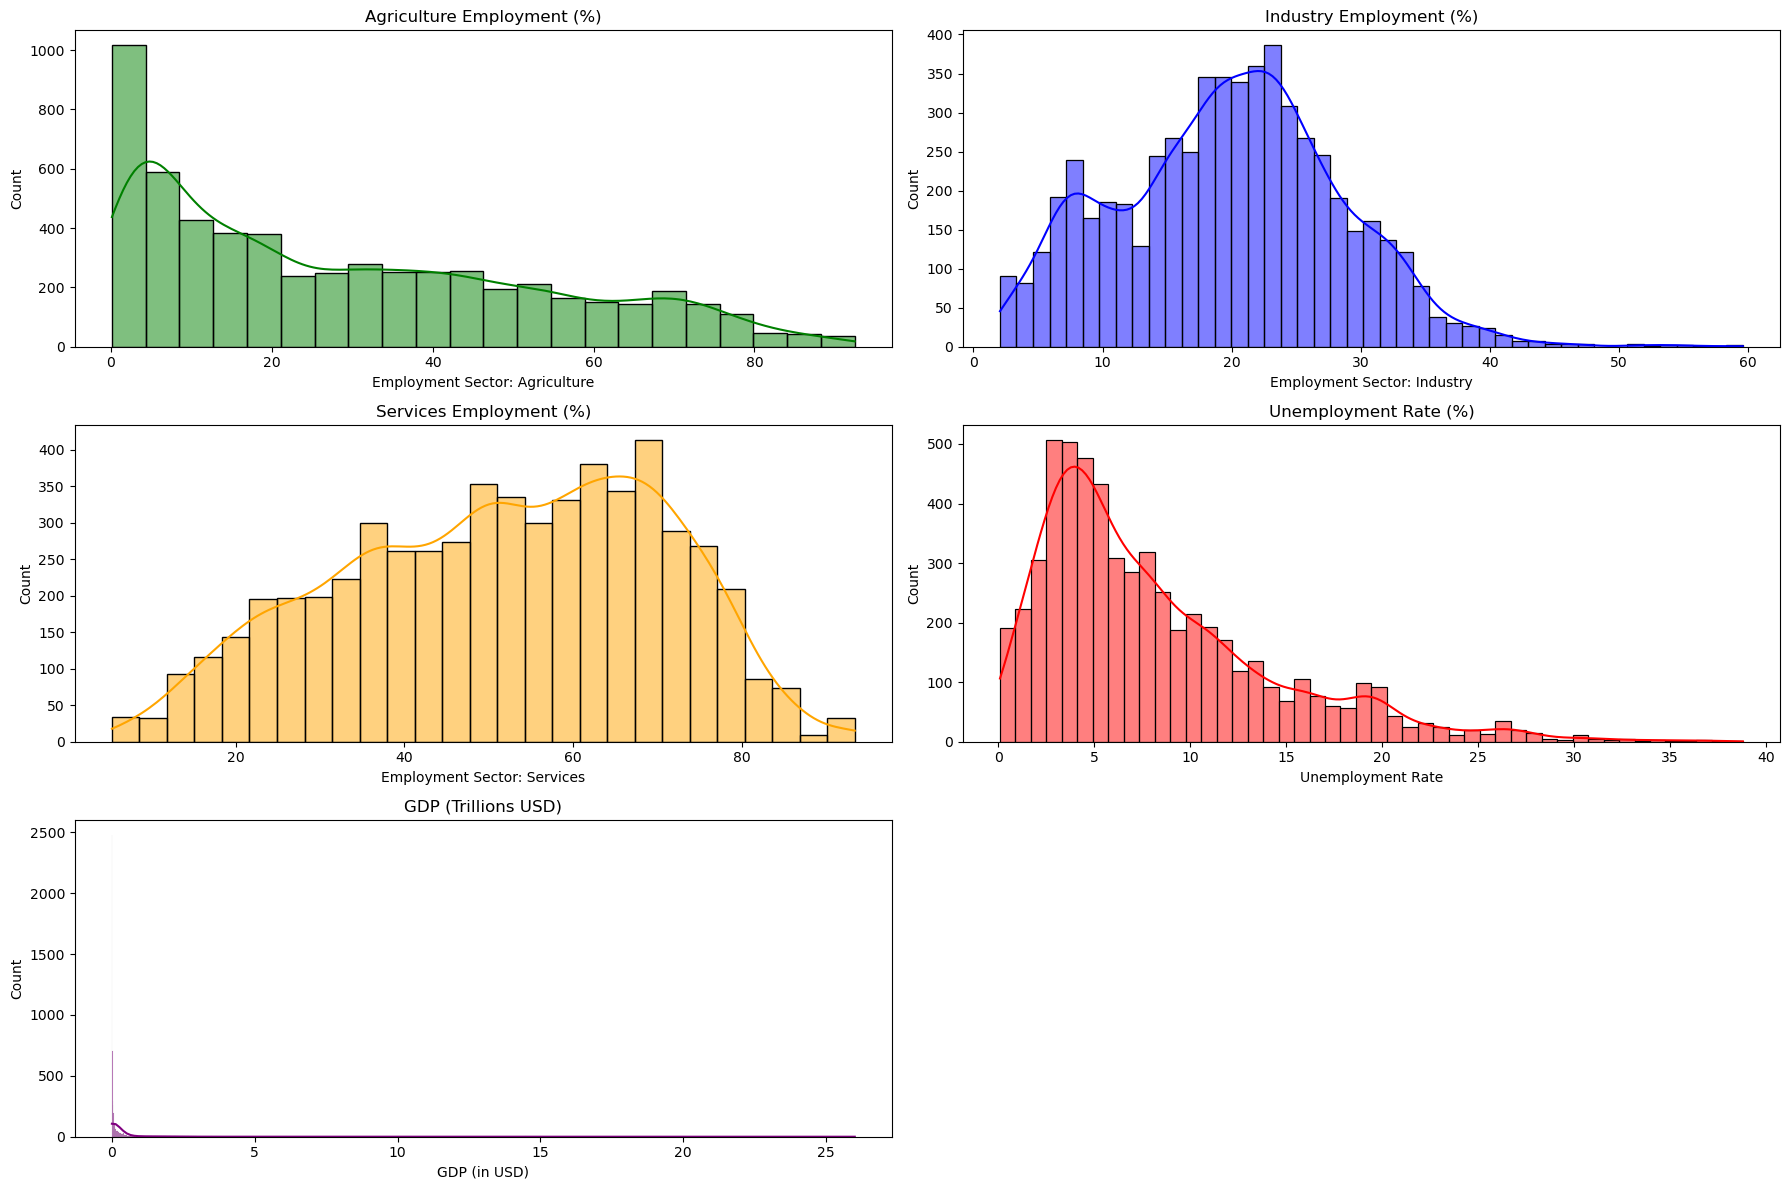

In [26]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
sns.histplot(df['Employment Sector: Agriculture'], kde=True, color='green')
plt.title('Agriculture Employment (%)')

plt.subplot(3, 2, 2)
sns.histplot(df['Employment Sector: Industry'], kde=True, color='blue')
plt.title('Industry Employment (%)')

plt.subplot(3, 2, 3)
sns.histplot(df['Employment Sector: Services'], kde=True, color='orange')
plt.title('Services Employment (%)')

plt.subplot(3, 2, 4)
sns.histplot(df['Unemployment Rate'], kde=True, color='red')
plt.title('Unemployment Rate (%)')

plt.subplot(3, 2, 5)
sns.histplot(df['GDP (in USD)'].pipe(lambda x: x / 1e12), kde=True, color='purple')
plt.title('GDP (Trillions USD)')

plt.tight_layout()
plt.show()


### **Markdown Explanation**
- **Agriculture**: Many countries have low agriculture employment, but some—especially in developing regions—still rely heavily on this sector.
- **Industry**: Most countries cluster around 15–25% industrial employment; a few are outliers, either very industrial or not at all.
- **Services**: Wealthy, developed countries dominate the high end, with services making up over 70% of employment.
- **Unemployment**: Most countries have moderate unemployment; some face much higher rates, often due to crises or transitions.
- **GDP**: A few countries have massive GDPs; most are much smaller—global economic inequality is clear.

> **Actionable Insight:**  
> Developing economies tend to have higher agriculture and lower services employment.  
> High unemployment outliers may indicate regions needing policy attention.

---

## **Step 4: Correlation Analysis**



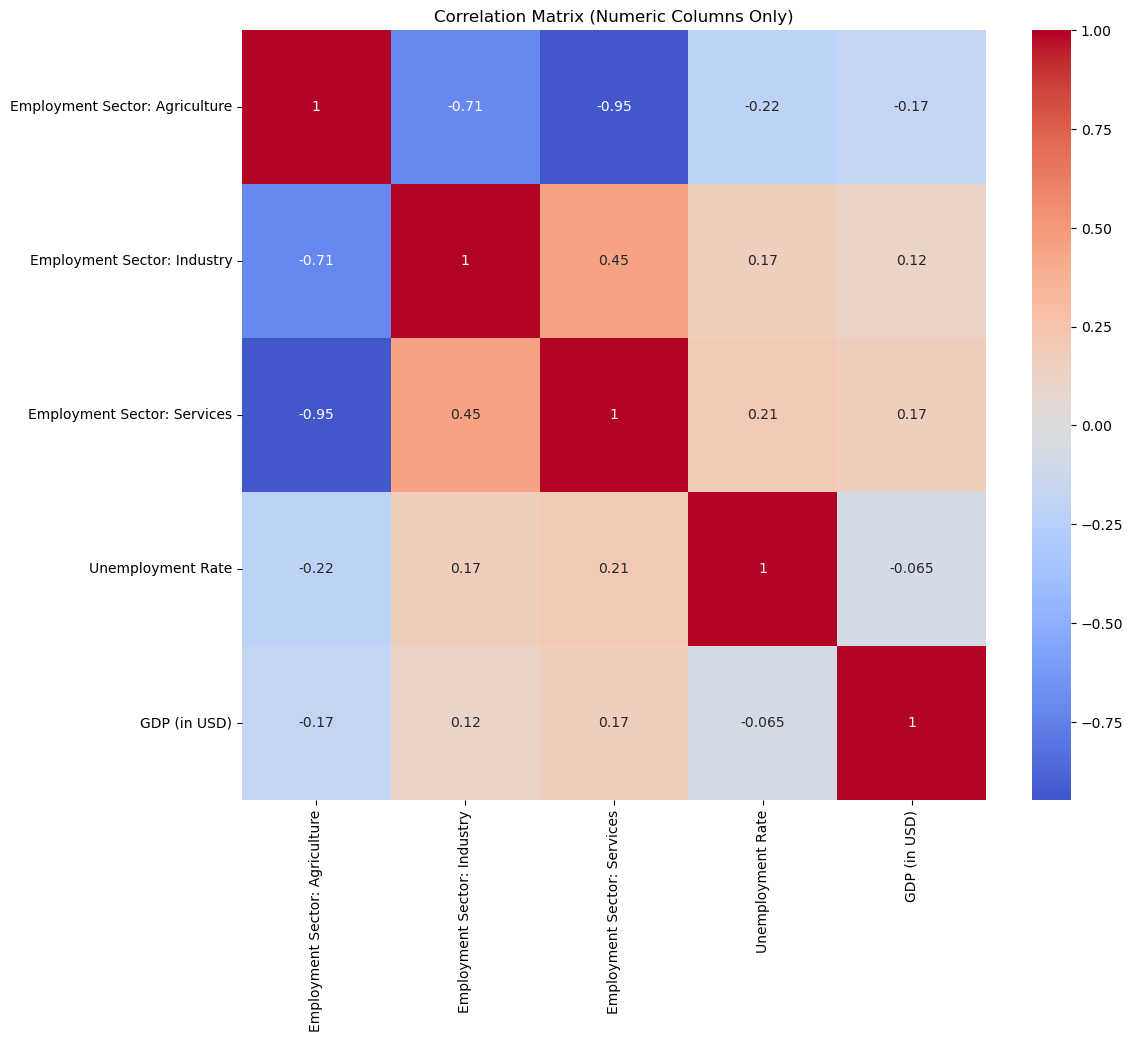

In [27]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()



# 4. Optional: Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

## **What I Noticed—My Key Takeaways**

After exploring the data globally and for specific countries, here’s what stood out to me and what it means from a real-world, business, and learning perspective:

---

### **Sector Shift is Real—And Not Always Smooth**

The data really shows that **most countries move away from agriculture and toward services as they get richer**—just like my textbooks say.  
But I saw a few **outliers that don’t fit this pattern**—some rich countries still have lots of farming, or some poorer countries leap straight into services.  
**Questions this raises:**  
Is there a local industry, resource, or policy behind this? Or is the data incomplete?  
This makes me want to **dig deeper into country-specific stories and news** to understand why.

---

### **Unemployment Is Not Just a Number**

When I looked at unemployment rates by country, **the spread was bigger than I expected**.  
Some countries have **consistent low or high unemployment**, but others swing wildly from year to year.  
This makes me think **job markets aren’t equally stable everywhere**, and that “GDP growth doesn’t always mean jobs for everyone.”  
**For business:** If I was planning to open a company, I’d look for countries with stable, predictable unemployment—not just rich ones.  
**For policy:** Places with high or volatile joblessness need different solutions than average.

---

### **The Service Sector Drives Modern Growth—Mostly**

There’s a strong, clear link between **services employment and GDP**—**richer countries have more office jobs, fewer farmers**.  
But, just because two things move together, doesn’t mean one causes the other.  
**I wonder:**  
Is it possible to jump straight into services without building industry first?  
Are there risks to relying too much on services, if the next crisis hits global offices and travel hard?

---

### **Economic Growth Doesn’t Guarantee Jobs**

I was surprised to see **unemployment and GDP usually aren’t strongly linked**.  
A country can get richer, but still have many people without jobs—**growth isn’t enough on its own**.  
**Real-world relevance:**  
If I was advising a government, I’d say **focus on both growth AND policies that link jobs directly to business**.  
For example, sometimes investments in education or infrastructure, not just GDP, are what create jobs.

---

### **India’s Story Stood Out**

Tracking GDP over time for India showed **growth spurts and dips, matching big news events**.  
This made the data feel **real, not just abstract numbers**—**policy, global trade, and local events all matter**.  
If I continue, I’d **overlay major news and policy changes** on my India GDP plot, to see what really drives growth or slowdown.

---





---

## Top GDP Growth Countries 


C:\Users\Rishi\AppData\Local\Temp\ipykernel_11480\1756502670.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gdp_growth.values * 100, y=gdp_growth.index, palette='Blues_r')


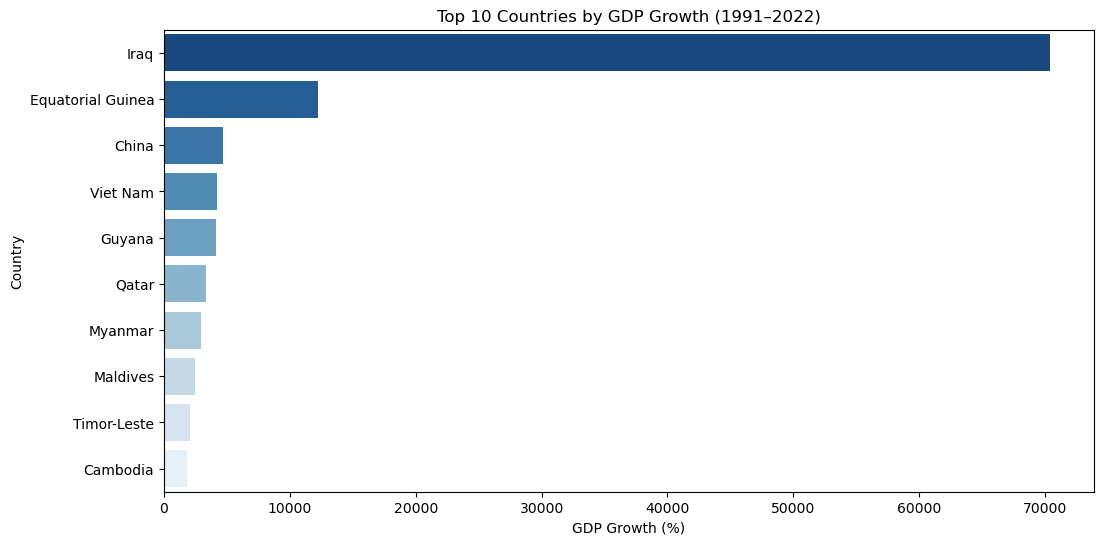

In [28]:
gdp_1991 = df[df['Year'] == '1991-01-01'].set_index('Country Name')['GDP (in USD)']
gdp_2022 = df[df['Year'] == '2022-01-01'].set_index('Country Name')['GDP (in USD)']
gdp_growth = ((gdp_2022 - gdp_1991) / gdp_1991).dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=gdp_growth.values * 100, y=gdp_growth.index, palette='Blues_r')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Country')
plt.title('Top 10 Countries by GDP Growth (1991–2022)')
plt.show()


---

##  Unemployment vs. GDP 



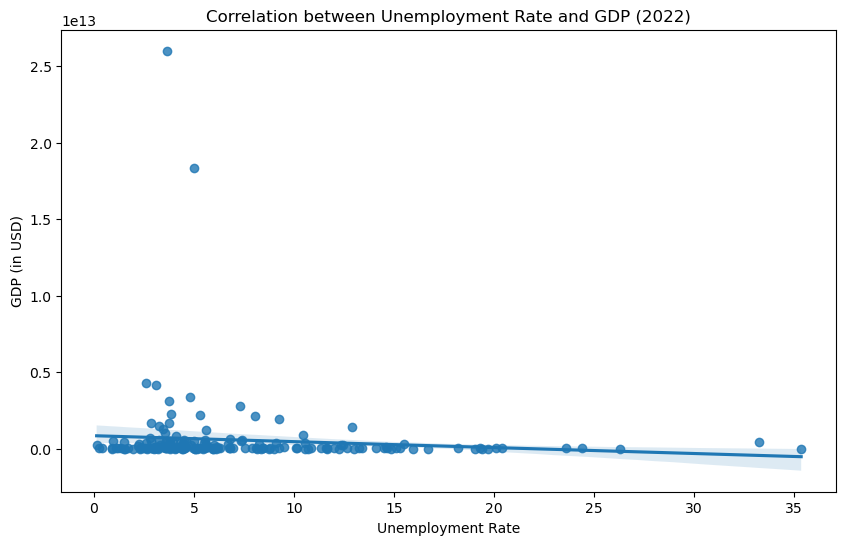

In [29]:
recent_year = df['Year'].max()
recent_data = df[df['Year'] == recent_year]
plt.figure(figsize=(10, 6))
sns.regplot(x='Unemployment Rate', y='GDP (in USD)', data=recent_data)
plt.title(f'Correlation between Unemployment Rate and GDP ({recent_year.year})')
plt.show()



Is There a Link Between Unemployment and GDP?
No strong global relationship—high GDP does not guarantee low unemployment.

Local labor markets, education, and policy are bigger drivers than national wealth.

Outliers exist: Some countries have high GDP and high unemployment, or vice versa.


---

##  Global Unemployment Trend 



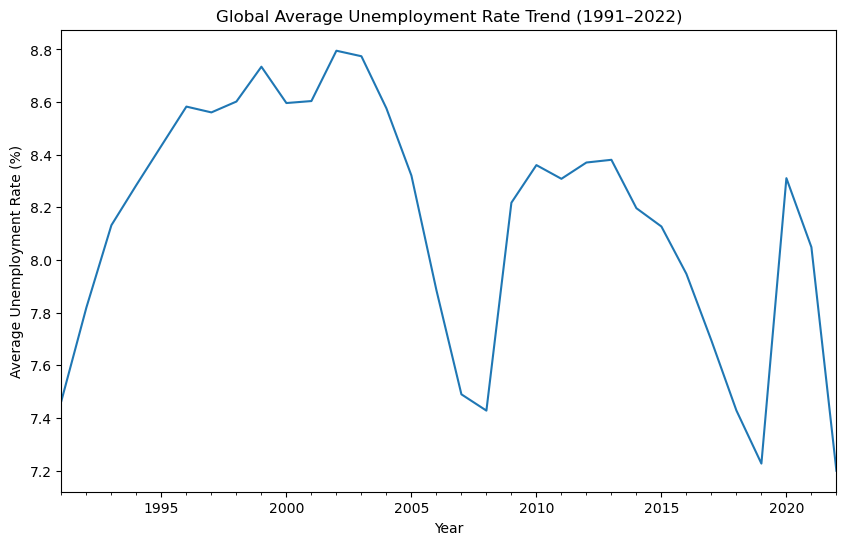

In [30]:
unemp_trend = df.groupby('Year')['Unemployment Rate'].mean()
plt.figure(figsize=(10, 6))
unemp_trend.plot()
plt.title('Global Average Unemployment Rate Trend (1991–2022)')
plt.ylabel('Average Unemployment Rate (%)')
plt.xlabel('Year')
plt.show()

How Has Global Unemployment Changed?
Spikes correspond to global crises (e.g., 2008 financial crisis, 2020 pandemic).

Recovery phases show how long it takes for labor markets to stabilize.

Use: Anticipate periods of global risk or opportunity for business and policy.


---

## **Step 8: Outlier Detection**



In [31]:
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# 3. Detect and print outliers
outliers = {}
for col in ['Employment Sector: Agriculture', 'Employment Sector: Industry',
            'Employment Sector: Services', 'Unemployment Rate', 'GDP (in USD)']:
    outliers[col] = iqr_outliers(df[col])
    print(f'{col}: {len(outliers[col])} outliers')
    print(f'Sample outliers: {outliers[col].head()}')
    print('─' * 50)

# 4. Show full outlier records
for col, series in outliers.items():
    print(f'\nOutliers in {col}:')
    print(df.loc[series.index, ['Country Name', 'Year', col]].head(10))
    print('─' * 50)

Employment Sector: Agriculture: 0 outliers
Sample outliers: Series([], Name: Employment Sector: Agriculture, dtype: float64)
──────────────────────────────────────────────────
Employment Sector: Industry: 30 outliers
Sample outliers: 22     43.342738
42     44.968429
136    45.550193
194    43.717213
214    44.162899
Name: Employment Sector: Industry, dtype: float64
──────────────────────────────────────────────────
Employment Sector: Services: 0 outliers
Sample outliers: Series([], Name: Employment Sector: Services, dtype: float64)
──────────────────────────────────────────────────
Unemployment Rate: 213 outliers
Sample outliers: 11     22.323
44     25.669
114    24.500
139    23.002
172    30.007
Name: Unemployment Rate, dtype: float64
──────────────────────────────────────────────────
GDP (in USD): 861 outliers
Sample outliers: 5     3.259753e+11
20    3.425341e+11
28    6.125277e+11
32    3.845105e+11
54    1.258962e+12
Name: GDP (in USD), dtype: float64
──────────────────────────

## **Outlier Analysis Interpretation**

- **Employment Sector Outliers:**  
  Countries with unusually high or low employment in a sector may be in rapid transition, crisis, or have unique economic structures.
- **Unemployment Rate Outliers:**  
  Extremely high values often signal economic distress (e.g., post-conflict, transition economies).  
  Very low values may reflect data quirks or highly regulated labor markets.
- **GDP Outliers:**  
  The highest GDPs belong to global economic powerhouses; the lowest may be small or crisis-affected economies.
- **These outliers are real data points**—don’t delete them without investigation. They reflect the diversity of economic development.

## **Actionable Next Steps**

- **Investigate specific outlier countries/years**—are there real-world events (e.g., war, policy change, natural disaster) behind the numbers?
- **Check for data entry errors** if any outlier seems implausible.
- **Consider visualizing these outliers** on a world map or timeline for deeper insight.
- **Use median and IQR** (not mean/std) for robust summaries when outliers are present.

## **Example Business Questions**

- **Which countries have persistently high unemployment?** (Check `Unemployment Rate` outliers.)
- **Are there countries shifting rapidly from agriculture to services?** (Check sector outliers over time.)
- **Which small economies have surprisingly high GDP?** (Check `GDP (in USD)` outliers for unexpected cases.)

---






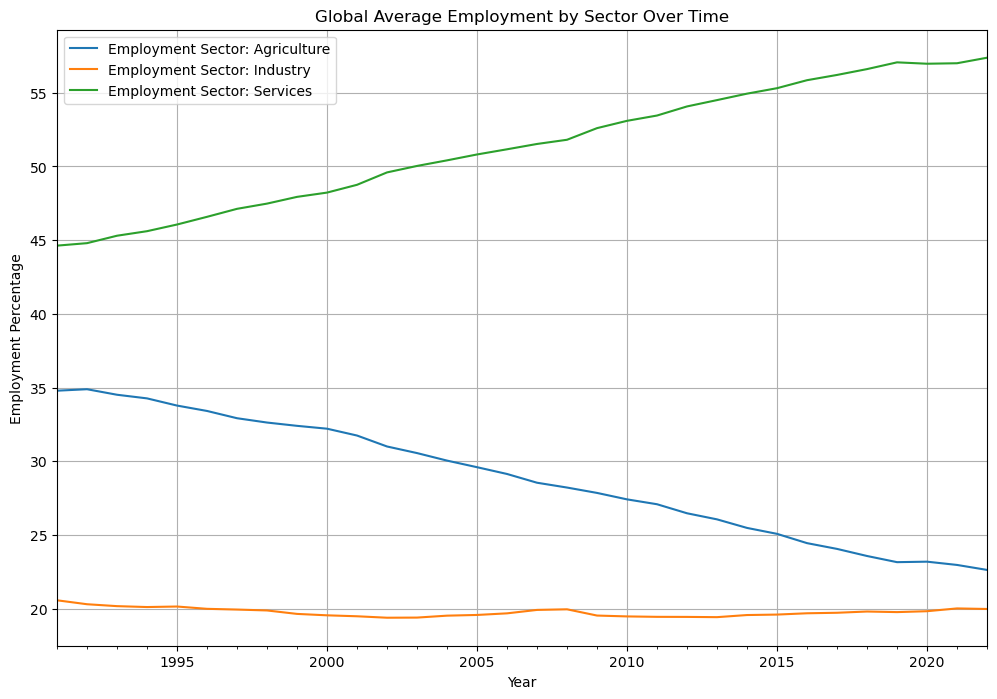

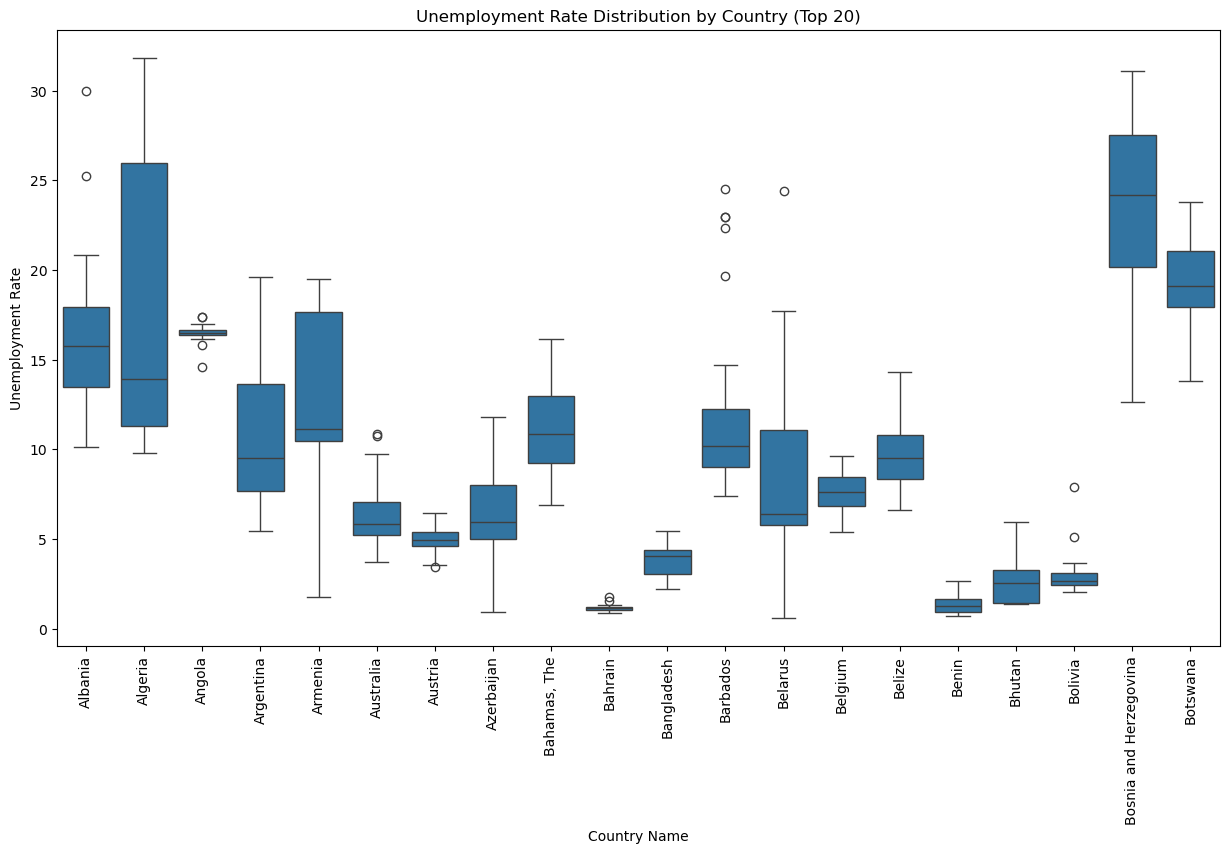

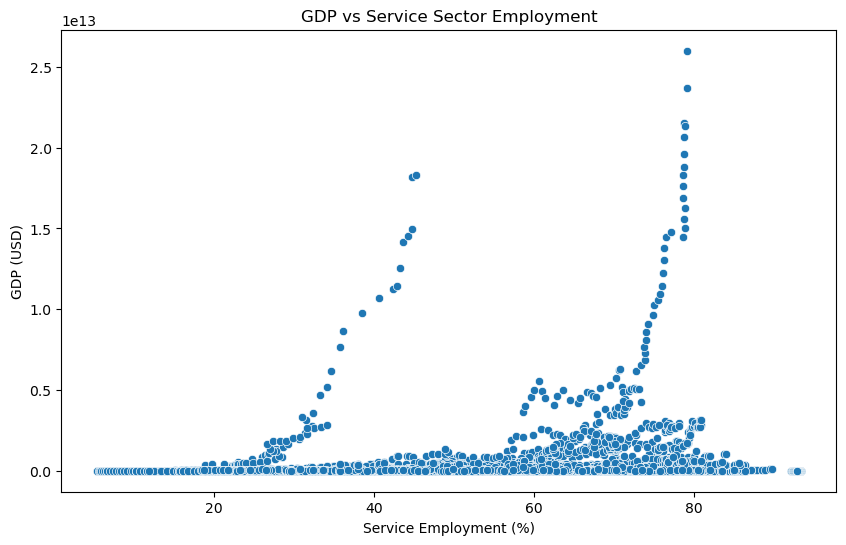

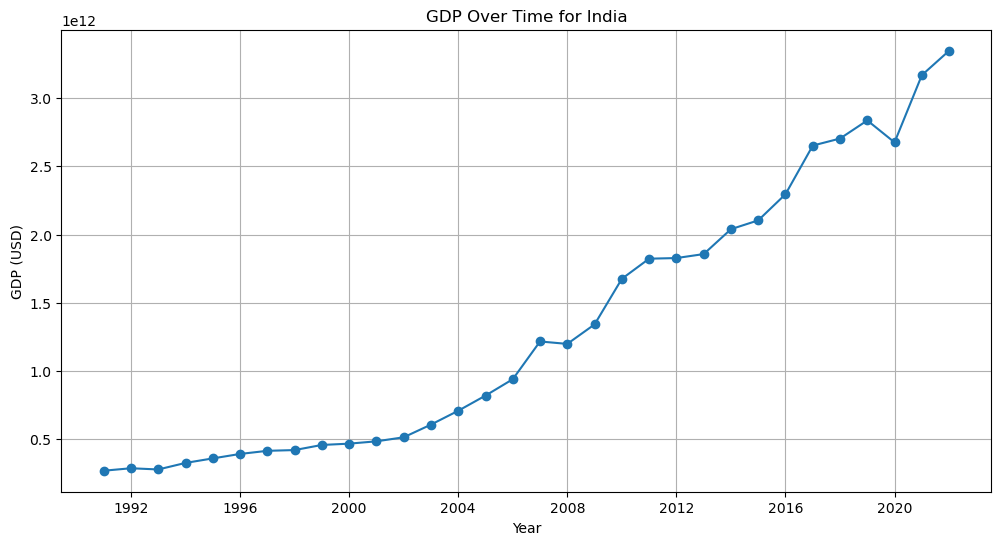

In [32]:

# Plot global employment sector trends over time
def plot_global_employment_trends(df):
    trend = df.groupby('Year')[['Employment Sector: Agriculture', 'Employment Sector: Industry', 'Employment Sector: Services']].mean()
    ax = trend.plot(figsize=(12, 8))
    ax.set_title('Global Average Employment by Sector Over Time')
    ax.set_ylabel('Employment Percentage')
    ax.set_xlabel('Year')
    ax.grid(True)
    plt.show()

# Boxplot of unemployment rate by country (best for subsets with fewer countries)
def plot_unemployment_boxplot(df, country_limit=20):
    top_countries = df['Country Name'].value_counts().head(country_limit).index
    subset = df[df['Country Name'].isin(top_countries)]
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='Country Name', y='Unemployment Rate', data=subset)
    plt.xticks(rotation=90)
    plt.title('Unemployment Rate Distribution by Country (Top 20)')
    plt.show()

# Scatter plot of GDP vs service sector employment
def plot_gdp_vs_services(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Employment Sector: Services', y='GDP (in USD)', data=df)
    plt.title('GDP vs Service Sector Employment')
    plt.xlabel('Service Employment (%)')
    plt.ylabel('GDP (USD)')
    plt.show()

# GDP over time for a specific country
def plot_gdp_over_time(df, country):
    country_data = df[df['Country Name'] == country]
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Year'], country_data['GDP (in USD)'], marker='o')
    plt.title(f'GDP Over Time for {country}')
    plt.xlabel('Year')
    plt.ylabel('GDP (USD)')
    plt.grid(True)
    plt.show()

# To use, call e.g.
plot_global_employment_trends(df)
plot_unemployment_boxplot(df)
plot_gdp_vs_services(df)
plot_gdp_over_time(df, 'India')


## **Making Sense of the Big Picture**

You’ve just plotted employment trends, unemployment distributions, GDP vs. services, and country-specific growth. Here’s what’s important from a business and policy perspective, in your own words:

---

### **Employment Sectors Over Time**

The average global picture shows **sectoral shifts**: as countries develop, fewer people work in agriculture, more move to industry, and eventually, services become the largest employer. This is normal, but the **speed and balance** matter.  
If some countries are stuck with high agriculture employment despite GDP growth, that’s a sign of **uneven development**—a point for deeper investigation.

---

### **Unemployment Distribution by Country**

The unemployment boxplot tells you **whose labor markets are stable and whose are not**.  
Countries with huge swings (wide boxes) might face **boom-and-bust cycles**—risky for business investment. Countries with **consistently high unemployment** have deeper problems (education, policy, industry structure).  
**For business:** Look for stable, predictable markets. **For policy:** Target unstable or high-unemployment areas with training or infrastructure.

---

### **GDP and Services Employment**

Your scatter plot likely shows that **richer countries have more service jobs**. This matches world experience—development moves from farms to factories to offices.  
But, if you see outliers (high GDP but still lots in agriculture, or vice versa), **look closer**—maybe it’s oil wealth, tourism, or a unique industry mix.

---

### **GDP Over Time for a Country**

When you plot GDP for a single country (e.g., India), you **connect numbers to real life**.  
Look for **growth spurts** (good policy, global boom) and **dips** (recessions, crises). If you see job growth lagging GDP growth, that’s a signal—jobs aren’t keeping up with wealth creation.

---

### **What This Means for Business and Policy**

- **Development patterns** mostly follow the textbook, but **local realities matter**. Always check the details.
- **Unemployment is more than a number**. High or volatile unemployment means risk for businesses, and a need for policy action.
- **Service-led growth** is the modern norm, but not every country fits. Find the unique cases—they’re often the most interesting.
- **Country stories** (like India’s GDP growth) show the impact of decisions, demography, and global trends.
